In [6]:
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = []
    nodes = set()
    for i in range(len(st) - k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k])) # get the L and R k-1 mers
        nodes.add(st[i:i+k-1]) # add the first k-1 mer as a node
        nodes.add(st[i+1:i+k]) # add the second k-1 mer as a node
    return nodes, edges  # re

In [7]:
nodes, edges = de_bruijn_ize("ACGCGTCG", 3)

In [8]:
nodes

{'AC', 'CG', 'GC', 'GT', 'TC'}

In [9]:
edges # this is the Eulerian walk through the graph

[('AC', 'CG'),
 ('CG', 'GC'),
 ('GC', 'CG'),
 ('CG', 'GT'),
 ('GT', 'TC'),
 ('TC', 'CG')]

In [8]:
def visualize_de_bruijn(st, k):
    """ Visualize a directed multigraph using graphviz """
    nodes, edges = de_bruijn_ize(st, k)
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += '  %s [label="%s"] ;\n' % (node, node)
    for src, dst in edges:
        dot_str += '  %s -> %s ;\n' % (src, dst)
    return dot_str + '}\n'

In [4]:
# might have to do this first:
%load_ext gvmagic


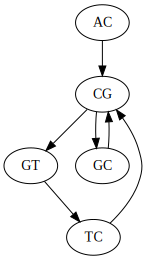

In [9]:
%dotstr visualize_de_bruijn("ACGCGTCG", 3)